In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [2]:
import json

with open('./samples/sample_data.json') as f:
    x = json.load(f)

In [3]:
num = 0
train_x = []
train_y = []
test_x = []
test_y = []


for case in x:
    if num < 800:
        train_x.append([case['feature']['length'],case['feature']['width']])
        train_y.append(case['feature']['height']) 
        
    elif num < 1000:
        test_x.append([case['feature']['length'],case['feature']['width']])
        test_y.append(case['feature']['height'])  
    num+=1 

train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y).reshape(800,1)
test_x = torch.tensor(test_x)
test_y = torch.tensor(test_y).reshape(200,1)


In [4]:
print(train_x)
print(train_y)
print(test_x)
print(test_y)
print(train_x.shape)

tensor([[0.2324, 0.0918],
        [0.2322, 0.0907],
        [0.2541, 0.0992],
        ...,
        [0.2508, 0.0968],
        [0.2540, 0.0938],
        [0.2358, 0.0892]])
tensor([[0.1073],
        [0.1095],
        [0.1163],
        [0.1096],
        [0.1098],
        [0.1146],
        [0.1141],
        [0.1194],
        [0.1125],
        [0.1077],
        [0.1094],
        [0.1109],
        [0.1077],
        [0.1140],
        [0.1127],
        [0.1117],
        [0.1113],
        [0.1146],
        [0.1170],
        [0.1116],
        [0.1175],
        [0.1089],
        [0.1125],
        [0.1120],
        [0.1125],
        [0.1188],
        [0.1105],
        [0.1147],
        [0.1151],
        [0.1143],
        [0.1105],
        [0.1117],
        [0.1118],
        [0.1107],
        [0.1037],
        [0.1076],
        [0.1129],
        [0.1108],
        [0.1142],
        [0.1129],
        [0.1139],
        [0.1181],
        [0.1145],
        [0.1111],
        [0.1122],
        [0.1103],
  

In [5]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self):
            self.x=train_x
            self.w=torch.zeros(2,1)
            self.b=torch.zeros(800,1)
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=train_y
            self.len=self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return len(self.x)

In [6]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        ythat=self.linear(x)
        return ythat

In [7]:
linear1 = torch.nn.Linear(2,100, bias = True)
linear2 = torch.nn.Linear(100,100, bias = True)
linear3 = torch.nn.Linear(100,100, bias = True)
linear4 = torch.nn.Linear(100,100, bias = True)
linear5 = torch.nn.Linear(100,100, bias = True)
linear6 = torch.nn.Linear(100,1, bias = True)
relu = torch.nn.ReLU()


In [8]:
criterion = nn.MSELoss()

In [9]:

def test(model, optimizer, x_test, y_test):
    sum = 0
    for x in x_test:
        prediction = model(x)
        loss = criterion(y_test, prediction)
        sum += (loss*100)
    print(sum/len(x_test))

In [10]:
train_loader=DataLoader(dataset=Data(),batch_size=800, shuffle=True)

In [15]:
LOSS = []
model=linear_regression(2,1)
optimizer = optim.SGD(model.parameters(), lr = 0.1)
for epoch in range(100):
    for x,y in train_loader:
        prediction = model(x)       
        loss=criterion(prediction ,y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
test(model, optimizer, test_x, test_y)


tensor(0.0033, grad_fn=<DivBackward0>)


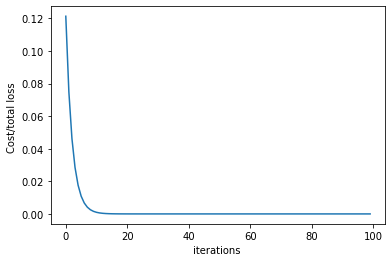

In [16]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()